In [2]:
import pandas as pd
swift_df = pd.read_csv('taylorswift.csv')
swift_df.head()

,artist,song-titles,song_lyrics,cleaned_song_lyrics,album,release_date,album_tracklist_url,song_titles_urls
0,Taylor-Swift,Lavender Haze,[Intro] Meet me at midnight [Verse 1] Staring ...,Meet me at midnight Staring at the ceiling w...,Midnights,"Released October 21, 2022",https://genius.com/albums/Taylor-Swift/Midnights,https://genius.com/Taylor-swift-lavender-haze-...
1,Taylor-Swift,Maroon,[Verse 1] When the morning came We were cleani...,When the morning came We were cleaning incens...,Midnights,"Released October 21, 2022",https://genius.com/albums/Taylor-Swift/Midnights,https://genius.com/Taylor-swift-maroon-lyrics
2,Taylor-Swift,Anti-Hero,"[Verse 1] I have this thing where I get older,...","I have this thing where I get older, but just...",Midnights,"Released October 21, 2022",https://genius.com/albums/Taylor-Swift/Midnights,https://genius.com/Taylor-swift-anti-hero-lyrics
3,Taylor-Swift,Snow On the Beach (Ft. Lana Del Rey),"[Verse 1: Taylor Swift] One night, a few moons...","One night, a few moons ago I saw flecks of wh...",Midnights,"Released October 21, 2022",https://genius.com/albums/Taylor-Swift/Midnights,https://genius.com/Taylor-swift-snow-on-the-be...
4,Taylor-Swift,"You're On Your Own, Kid","[Verse 1] Summer went away, still, the yearnin...","Summer went away, still, the yearning stays I...",Midnights,"Released October 21, 2022",https://genius.com/albums/Taylor-Swift/Midnights,https://genius.com/Taylor-swift-youre-on-your-...


In [10]:
import flair
from flair.models import TextClassifier
from flair.data import Sentence
sia = TextClassifier.load('en-sentiment')
def flair_prediction(x):
    sentence = Sentence(x)
    sia.predict(sentence)
    # get sentiment label
    sentiment = str(sentence.labels[0]).split("→",1)[1]
    # get sentiment number from string
    sent_float = float(sentiment[sentiment.find("(") + 1 : sentiment.find(")")])
    if ("NEGATIVE" in sentiment):
        sent_float *= -1
    return sent_float
swift_df["sentiment"] = swift_df["cleaned_song_lyrics"].apply(flair_prediction)

2022-12-07 20:47:42,416 loading file /Users/rcollado/.flair/models/sentiment-en-mix-distillbert_4.pt


In [5]:
swift_df = swift_df.drop(['artist', 'song_lyrics', 'album_tracklist_url', 'song_titles_urls'], axis=1)

In [6]:
def clean_year(date):
    return int(date.split(", ",1)[1])
swift_df["year"] = swift_df["release_date"].apply(clean_year)

In [11]:
swift_df

,song-titles,cleaned_song_lyrics,album,release_date,sentiment,year
0,Lavender Haze,Meet me at midnight Staring at the ceiling w...,Midnights,"Released October 21, 2022",-0.9405,2022
1,Maroon,When the morning came We were cleaning incens...,Midnights,"Released October 21, 2022",-0.9884,2022
2,Anti-Hero,"I have this thing where I get older, but just...",Midnights,"Released October 21, 2022",-0.9983,2022
3,Snow On the Beach (Ft. Lana Del Rey),"One night, a few moons ago I saw flecks of wh...",Midnights,"Released October 21, 2022",-0.9998,2022
4,"You're On Your Own, Kid","Summer went away, still, the yearning stays I...",Midnights,"Released October 21, 2022",0.8662,2022
...,...,...,...,...,...,...
149,Our Song,I was ridin' shotgun with my hair undone In t...,Taylor-Swift,"Released October 24, 2006",-0.9966,2006
150,I'm Only Me When I'm With You,Friday night beneath the stars In a field beh...,Taylor-Swift,"Released October 24, 2006",0.9737,2006
151,Invisible,She can't see the way your eyes Light up when...,Taylor-Swift,"Released October 24, 2006",0.9995,2006
152,A Perfectly Good Heart,Why would you wanna break A perfectly good he...,Taylor-Swift,"Released October 24, 2006",-0.9672,2006


In [13]:
sentiment_by_year = swift_df.groupby('year')['sentiment'].mean().reset_index(name = 'avg_sentiment')
sentiment_by_year

,year,avg_sentiment
0,2006,0.342680
1,2008,-0.044115
2,2010,-0.147593
3,2012,0.263311
4,2014,0.053531
5,2017,0.360200
6,2019,-0.003578
7,2020,-0.234813
8,2022,-0.128238


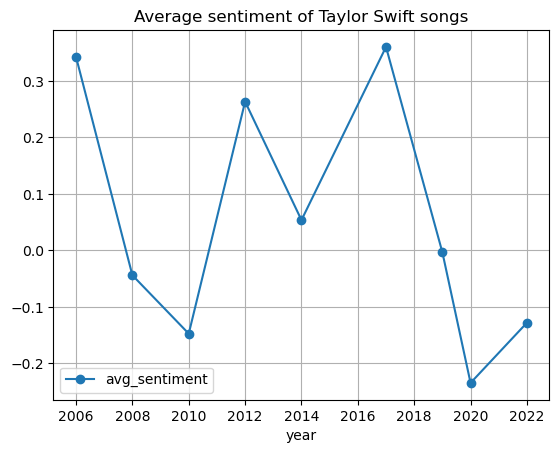

In [18]:
import matplotlib as plt
plt = sentiment_by_year.plot(x = "year", marker='o', title='Average sentiment of Taylor Swift songs')
plt.grid('on')